In [94]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

sys.path.append('..')
from libs.constants import * 

In [95]:
sample_freq = 500e3

bat_ids = ['bat290', 'bat294', 'bat296', 'bat298']
path = raw_sound_190526_path / bat_ids[0]

In [96]:
arr = np.fromfile(str(path /'no1.bin'), dtype=np.int16)

print(arr.shape)

(480000000,)


In [97]:
tracks = arr.reshape(int(arr.shape[0]/32), 32)[:, :16].T
print(tracks.shape)

(16, 15000000)


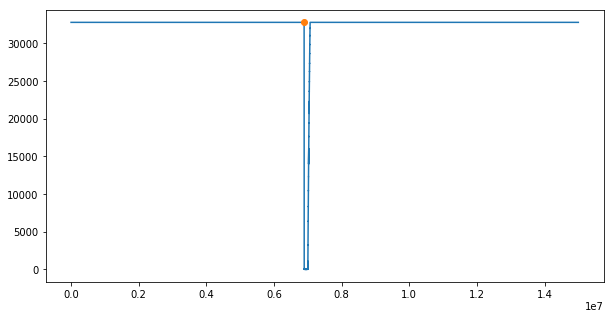

In [98]:
fly_start_sec = -2.
fly_end_sec = -1.1

trigger_ind = np.where(tracks[0, :]<30000)[0][0]
trigger_sec = trigger_ind / sample_freq

mov_start_ind = int(trigger_ind - 6 * sample_freq)
mov_end_ind = trigger_ind

fly_start_ind = int(mov_end_ind + fly_start_sec * sample_freq)
fly_end_ind = int(mov_end_ind + fly_end_sec * sample_freq)

cropped_tracks = tracks[:, fly_start_ind:fly_end_ind]

plt.figure(figsize=(10, 5))
plt.plot(tracks[0, :])
# plt.plot(range(trigger_ind, trigger_ind+1000), 20000*np.ones(1000), 'o')
plt.plot(trigger_ind, tracks[0, 0], 'o')
plt.show()

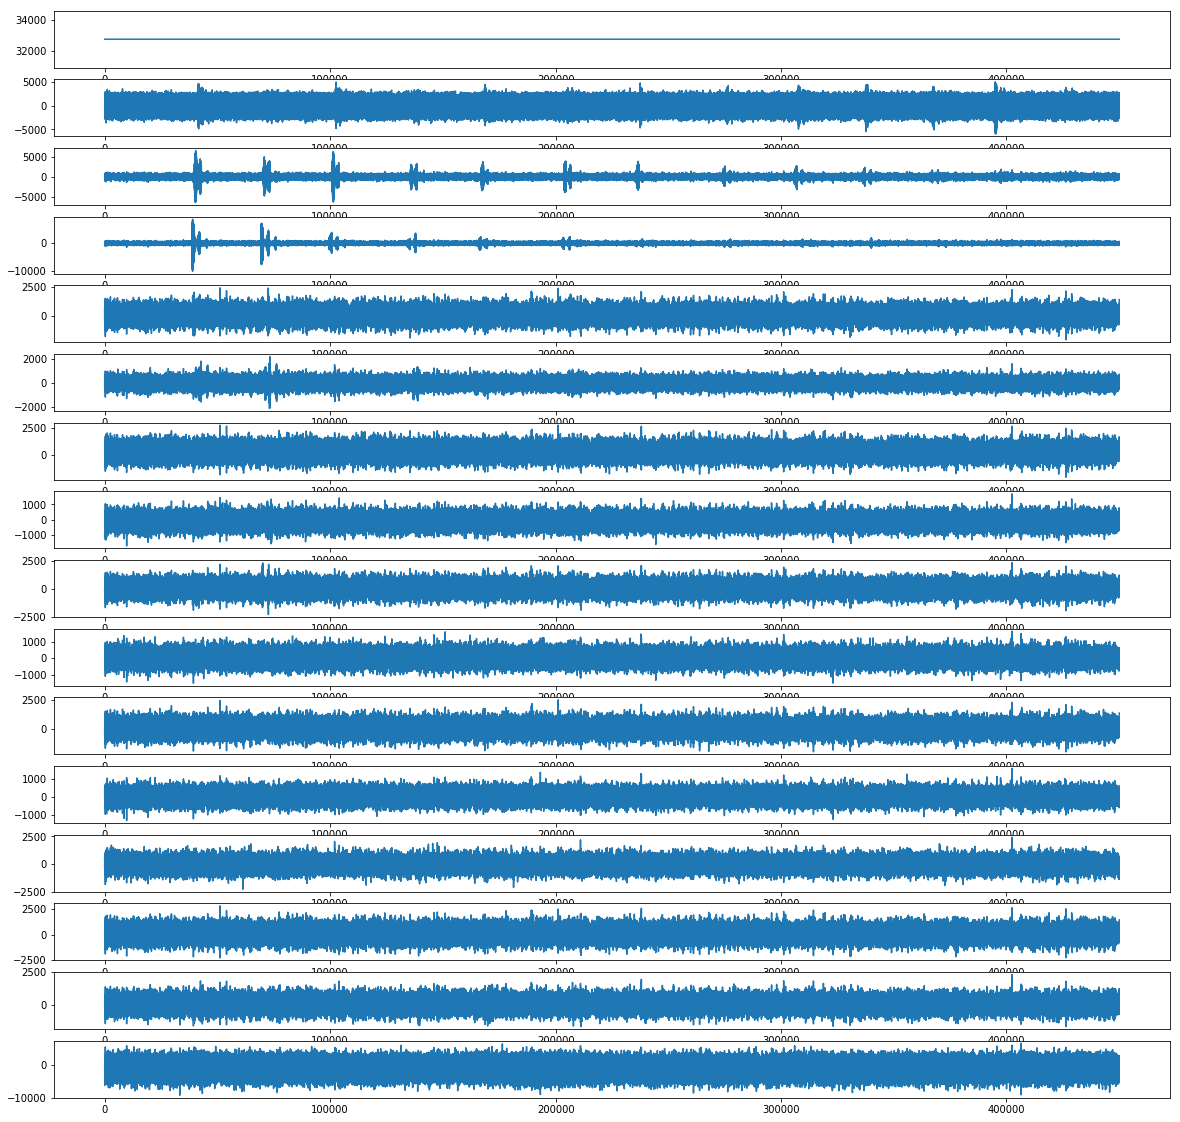

In [99]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(16, 1, i+1)
    plt.plot(cropped_tracks[i, :])
    
plt.show()

In [100]:
200e3

200000.0

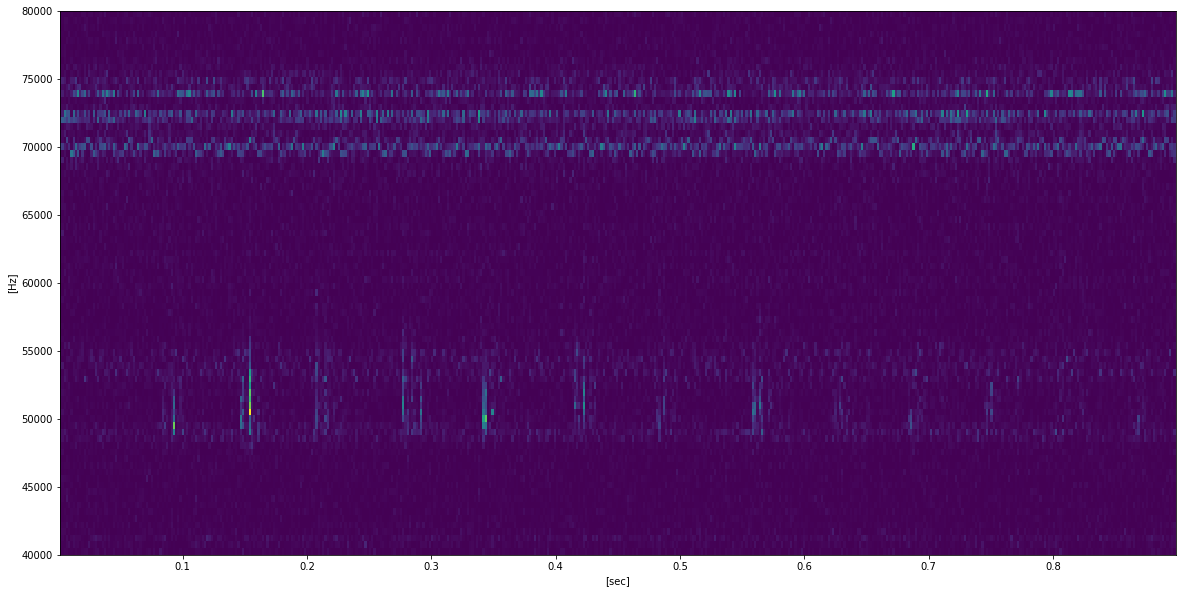

In [198]:
def convert_spectrogram(audio_tracks, sample_frequency=500e3, ):
    spectro = []
    for track in audio_tracks:
        f, t, Sxx = signal.spectrogram(track, 500e3, nperseg=2**10)
        spectro.append() 

plt.figure(figsize=(20, 10))
plt.pcolormesh(t, f, Sxx)
# plt.xlim([7.25, 7.5])
plt.ylim([40e3, 80e3])
plt.xlabel('[sec]')
plt.ylabel('[Hz]')
plt.show()

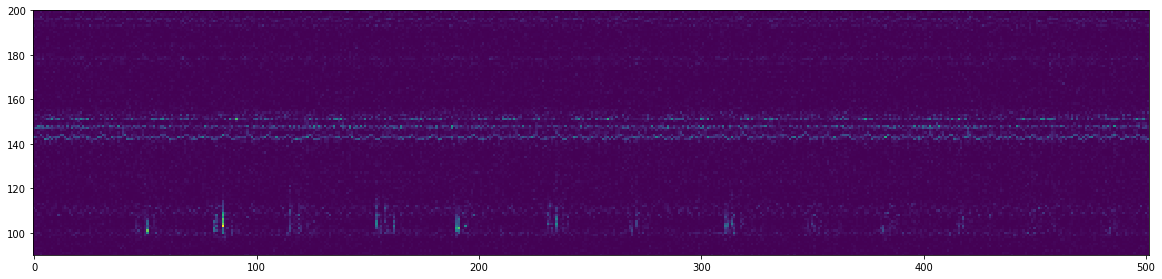

In [199]:
plt.figure(figsize=(20, 10))
plt.ylim([90, 200])
plt.imshow(Sxx)

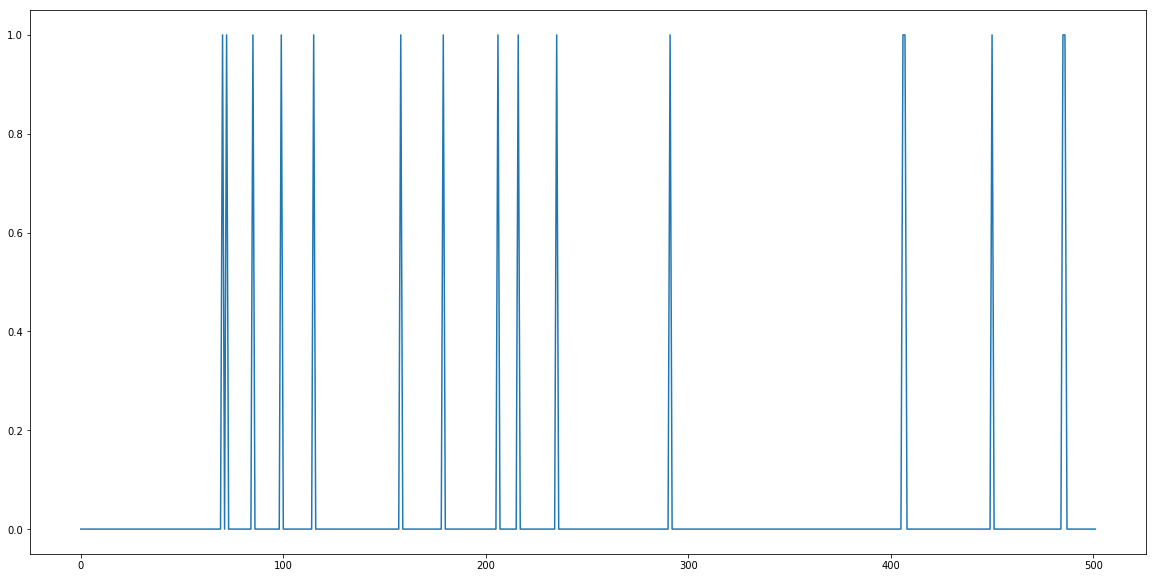

In [203]:
plt.figure(figsize=(20, 10))
plt.plot(np.where(Sxx[110]>2, 1, 0))

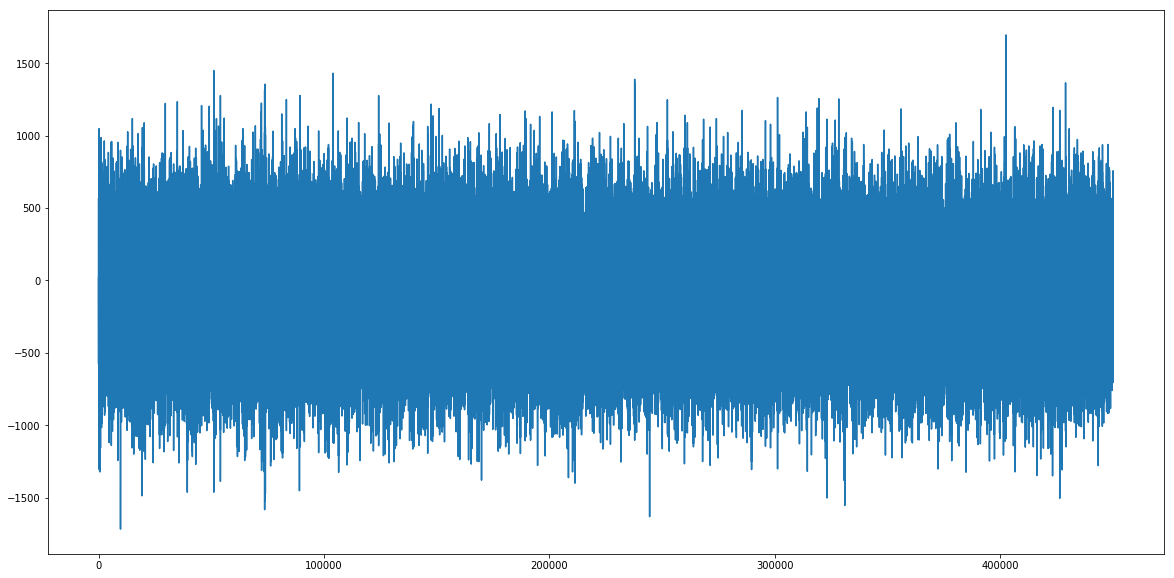

In [158]:
plt.figure(figsize=(20, 10))
plt.plot(cropped_tracks[7])

In [103]:
plt.figure(figsize=(20, 10))
plt.plot(mat[:, 12])

NameError: name 'mat' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
sp = np.fft.fft(mat[:100000, 1])
freq = np.fft.fftfreq(2**4)
plt.plot(sp)
print(sp)

In [ ]:
def get_freq_time(signal, stride=2**12):
    freq_time = []  
    for i in range(len(signal)-stride):
        sp = np.fft.fft(signal[i:i+stride])
        freq_time.append(sp.real)
    return np.array(freq_time)

In [ ]:
ft = get_freq_time(mat[:100000, 2])

In [ ]:
ft.shape

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(ft[:10000, :].T)

In [ ]:
5e-06*(2**12)